# ML Task-02

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [65]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Pre-processing 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
df = df.drop('Gender', axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [69]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

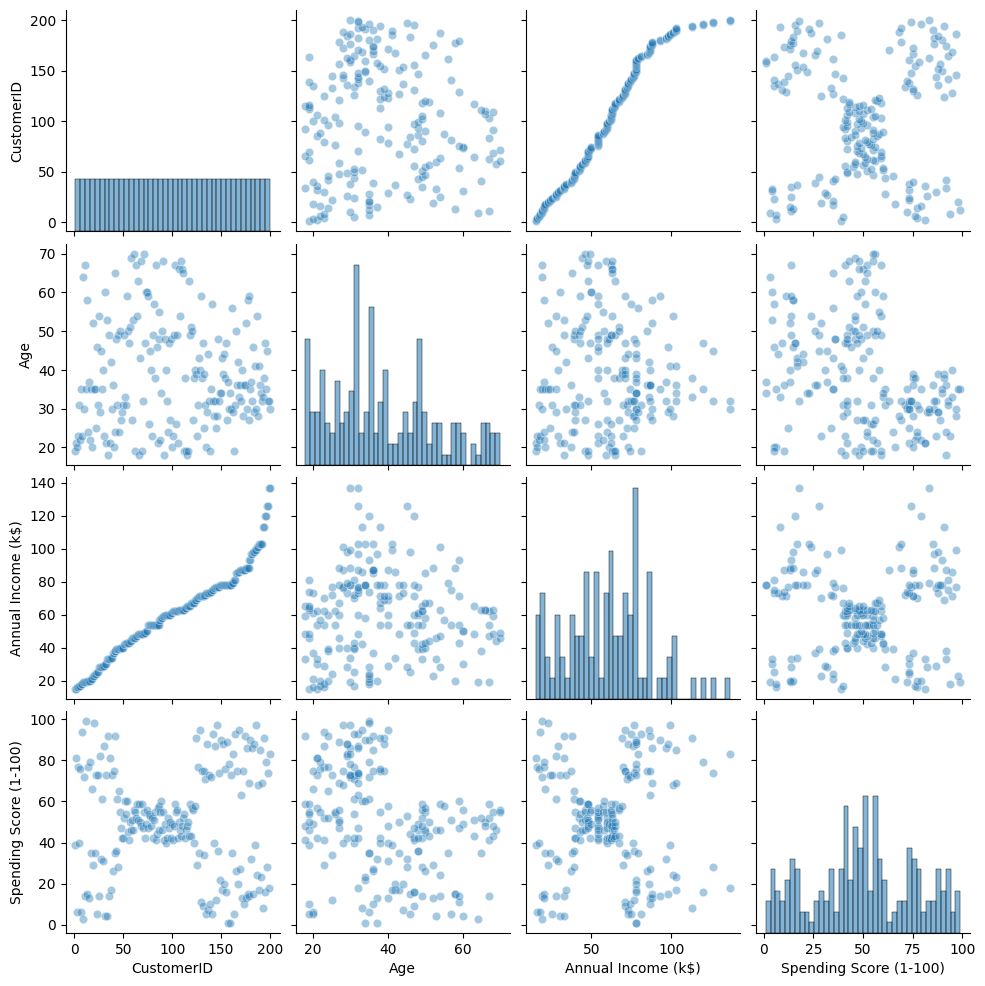

In [70]:
sns.pairplot(df, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

# Clustering using K- means

### Select relevant columns

In [79]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X = np.nan_to_num(X)

### Standardize the data

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.set_printoptions(threshold=5)  
print(X_scaled)


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 ...
 [ 2.49780745  0.92395314]
 [ 2.91767117 -1.25005425]
 [ 2.91767117  1.27334719]]


In [81]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method

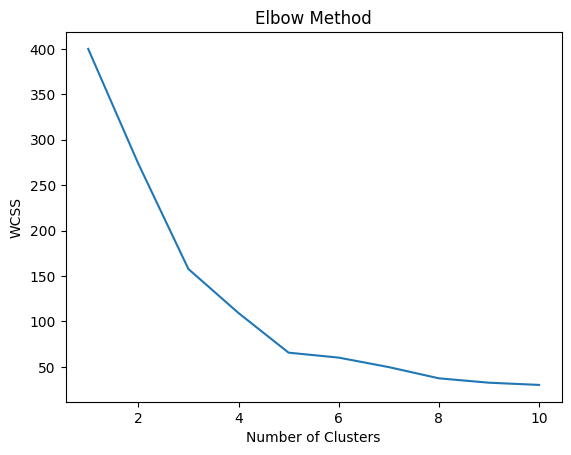

In [74]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-means model

In [75]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,2,21,15,81,2
2,3,20,16,6,4
3,4,23,16,77,2
4,5,31,17,40,4


In [76]:
df.groupby('Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


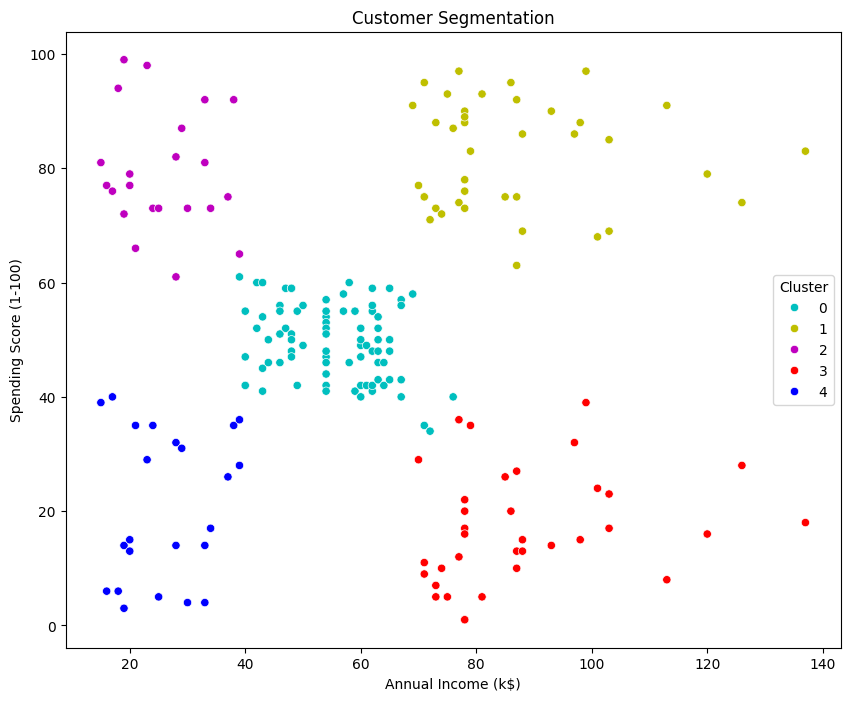

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette=['c', 'y', 'm', 'r', 'b'])
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Conclusion 

Upon applying the K-Means algorithm with 5 clusters, we segmented the customers effectively. The clusters were visualized using a scatter plot with distinct colors representing each cluster. This visualization revealed clear groupings within the data, highlighting differences in spending behavior and income levels among customers.